Importing data from file

#importing data
import pandas as p

In [ ]:
window_size = 4
words = []

with open('linux_data.txt', 'r', encoding='utf-8') as f:
    text = f.read()

text = text[:len(text)]  # Use second half of the text

# Split into lines
lines = text.split('\n')

for line in lines:
    line = line.strip()
    if not line:
        continue
    parts = line.split() 

    words.extend(parts + ['<PAD>'] * window_size)

print(words[:50])


['/*', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '*', 'linux/kernel/irq/autoprobe.c', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '*', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '*', 'Copyright', '(C)', '1992,', '1998-2004', 'Linus', 'Torvalds,', 'Ingo', 'Molnar', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '*', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '*', 'This', 'file', 'contains', 'the', 'interrupt', 'probing', 'code', 'and', 'driver', 'APIs.', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '*/']


In [2]:
# import re

# # Read the dataset
# with open('linux_data.txt', 'r', encoding='utf-8') as f:
#     text = f.read()

# text = text.split('\n')


In [3]:
# window_size = 4

# words = []
# for line in text:
#     line = line.strip()
#     if line:  # skip empty lines
#         words.extend(line.split(' ') + ['<PAD>'] * window_size)

In [4]:
words

['/*',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '*',
 'linux/kernel/irq/autoprobe.c',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '*',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '*',
 'Copyright',
 '(C)',
 '1992,',
 '1998-2004',
 'Linus',
 'Torvalds,',
 'Ingo',
 'Molnar',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '*',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '*',
 'This',
 'file',
 'contains',
 'the',
 'interrupt',
 'probing',
 'code',
 'and',
 'driver',
 'APIs.',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '*/',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '#include',
 '<linux/irq.h>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '#include',
 '<linux/module.h>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '#include',
 '<linux/interrupt.h>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '#include',
 '<linux/delay.h>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '#include',
 '<linux/async.h>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '#include',
 '"internals.h"',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '/*',
 '<P

In [5]:
window_size = 4

X, Y = [], []
for i in range(len(words)):
    start_idx = max(0, i - window_size)
    context = words[start_idx:i]
    context = ['<PAD>'] * (window_size - len(context)) + context  # left padding
    target = words[i]
    
    X.append(context)
    Y.append(target)


for i in range(100):
    print(' '.join(X[i]), '--->', Y[i])


<PAD> <PAD> <PAD> <PAD> ---> /*
<PAD> <PAD> <PAD> /* ---> <PAD>
<PAD> <PAD> /* <PAD> ---> <PAD>
<PAD> /* <PAD> <PAD> ---> <PAD>
/* <PAD> <PAD> <PAD> ---> <PAD>
<PAD> <PAD> <PAD> <PAD> ---> *
<PAD> <PAD> <PAD> * ---> linux/kernel/irq/autoprobe.c
<PAD> <PAD> * linux/kernel/irq/autoprobe.c ---> <PAD>
<PAD> * linux/kernel/irq/autoprobe.c <PAD> ---> <PAD>
* linux/kernel/irq/autoprobe.c <PAD> <PAD> ---> <PAD>
linux/kernel/irq/autoprobe.c <PAD> <PAD> <PAD> ---> <PAD>
<PAD> <PAD> <PAD> <PAD> ---> *
<PAD> <PAD> <PAD> * ---> <PAD>
<PAD> <PAD> * <PAD> ---> <PAD>
<PAD> * <PAD> <PAD> ---> <PAD>
* <PAD> <PAD> <PAD> ---> <PAD>
<PAD> <PAD> <PAD> <PAD> ---> *
<PAD> <PAD> <PAD> * ---> Copyright
<PAD> <PAD> * Copyright ---> (C)
<PAD> * Copyright (C) ---> 1992,
* Copyright (C) 1992, ---> 1998-2004
Copyright (C) 1992, 1998-2004 ---> Linus
(C) 1992, 1998-2004 Linus ---> Torvalds,
1992, 1998-2004 Linus Torvalds, ---> Ingo
1998-2004 Linus Torvalds, Ingo ---> Molnar
Linus Torvalds, Ingo Molnar ---> <PAD>
Torva

In [6]:
from collections import Counter

word_counts = Counter(words)
vocab = sorted(word_counts.keys()) 
vocab_size = len(vocab)

print("Vocabulary Size:", vocab_size)

Vocabulary Size: 16287


In [7]:
most_common_10 = word_counts.most_common(10)
least_common_10 = word_counts.most_common()[-10:]

print("10 Most Frequent Words:", most_common_10)
print("10 Least Frequent Words:", least_common_10)


10 Most Frequent Words: [('<PAD>', 80312), ('*', 3276), ('=', 2574), ('{', 1775), ('}', 1646), ('if', 1598), ('the', 1504), ('*/', 1474), ('/*', 1334), ('return', 1010)]
10 Least Frequent Words: [('rcu_start_gp_advanced(rsp,', 1), ('Report', 1), ('involves', 1), ('letting', 1), ('rcu_start_gp()', 1), ('rcu_report_qs_rsp(struct', 1), ('flags)', 1), ('__releases(rcu_get_root(rsp)->lock)', 1), ('WARN_ON_ONCE(!rcu_gp_in_progress(rsp));', 1), ('raw_spin_unlock_irqrestore(&rcu_g', 1)]


In [8]:
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Apple Silicon GPU (MPS)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using NVIDIA GPU (CUDA)")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using Apple Silicon GPU (MPS)


In [9]:
stoi = {word: i for i, word in enumerate(vocab)}
itos = {i: word for word, i in stoi.items()}
emb_dim = 64
emb = torch.nn.Embedding(len(stoi), emb_dim)
print(stoi)
print(itos)

{'!': 0, '!!(rnp->qsmask': 1, '!!arg;': 2, '!!match': 3, '!(!nr_copy_pages': 4, '!(child->state': 5, '!(desc->istate': 6, '!(mask': 7, '!(rsp->gpnum': 8, '!(sig->flags': 9, '!(sighand->action[SIGCHLD-1].sa.sa_flags': 10, '!(signal->flags': 11, '!(torture_random(&rand)': 12, '!(torture_random(rrsp)': 13, '!*rdp->nxttail[RCU_DONE_TAIL])': 14, '!0': 15, '!=': 16, '!ACCESS_ONCE(rsp->gp_flags)': 17, '!ACCESS_ONCE(t->on_rq)': 18, '!CONFIG_DEBUG_OBJECTS_RCU_HEAD': 19, '!CONFIG_DEBUG_OBJECTS_RCU_HEAD,': 20, '!CONFIG_NO_HZ_COMMON': 21, '!CONFIG_ODD_RT_SIGACTION': 22, '!PT_SEIZED,': 23, '!RB_EMPTY_ROOT(&lock->waiters);': 24, '!RB_EMPTY_ROOT(&p->pi_waiters);': 25, '!S_ISREG(inode->i_mode))': 26, '!ULONG_CMP_GE(rdp->nxtcompleted[i],': 27, '!barrier_cbs_wq)': 28, '!barrier_phase;': 29, '!cpu_needs_another_gp(rsp,': 30, '!cpu_online(cpu))': 31, '!cur_ops->cond_sync))': 32, '!cur_ops->deferred_free)': 33, '!cur_ops->exp_sync)': 34, '!cur_ops->sync)': 35, '!data->frozen': 36, '!dbg_kdb_mode;': 37, '!d

In [10]:
print(emb.weight.shape)  # should be (vocab_size, emb_dim)

torch.Size([16287, 64])


In [11]:
X_encoded = [[stoi[word] for word in seq] for seq in X]
Y_encoded = [stoi[word] for word in Y] 

In [12]:
print(X_encoded[:5])

[[3135, 3135, 3135, 3135], [3135, 3135, 3135, 2913], [3135, 3135, 2913, 3135], [3135, 2913, 3135, 3135], [2913, 3135, 3135, 3135]]


In [13]:
stoi['<PAD>']

3135

In [14]:
X = torch.tensor(X_encoded, dtype=torch.long).to(device)
Y = torch.tensor(Y_encoded, dtype=torch.long).to(device)

In [15]:
emb.weight

Parameter containing:
tensor([[ 1.2617, -0.5329, -0.3906,  ..., -0.9771, -0.4859, -1.4310],
        [ 0.2151, -0.4843, -0.5552,  ...,  0.3931,  0.9296,  0.1937],
        [ 0.0580, -2.2184, -0.5759,  ...,  0.6695, -1.6467, -0.7253],
        ...,
        [-0.7672, -0.2631,  1.1728,  ..., -0.5132, -0.9257, -0.5164],
        [-0.7482,  0.1637, -1.2804,  ..., -0.0144,  0.0475, -1.1868],
        [ 1.2174,  0.2430, -0.0124,  ...,  1.5726,  0.6391, -1.2568]],
       requires_grad=True)

In [16]:
emb.weight.shape

torch.Size([16287, 64])

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [18]:
class Nextword(nn.Module):
    def __init__(self, block_size, vocab_size, emb_dim=64, hidden_size=1024):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(block_size * emb_dim, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        # x: (batch, block_size)
        x = self.emb(x)                           # (batch, block_size, emb_dim)
        x = x.view(x.shape[0], -1)                # flatten
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)                           # logits
        return x



In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
train_data = torch.utils.data.TensorDataset(X_train, Y_train)
val_data = torch.utils.data.TensorDataset(X_val, Y_val)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32)



In [20]:
import time
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def print_model_summary(model):
    print("Model Summary:")
    for name, module in model.named_modules():
        if len(list(module.children())) == 0:
            params = sum(p.numel() for p in module.parameters())
            print(f"{name:<20} {params:,} parameters")
    print(f"\nTotal trainable parameters: {count_params(model):,}\n")


import torch
import torch.nn as nn
import time

def train_model(model, X, Y, X_val, Y_val, epochs=500, batch_size=1024, lr=1e-3, wd=1e-4, print_every=100):
    """Train the MLP model using AdamW optimizer."""
    model.train()
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    loss_fn = nn.CrossEntropyLoss()

    losses, times, val_losses = [], [], []

    for epoch in range(epochs):
        start = time.time()
        total_loss, n_batches = 0, 0

        # -------- Training --------
        for i in range(0, X.shape[0], batch_size):
            x_batch = X[i:i+batch_size]
            y_batch = Y[i:i+batch_size]

            logits = model(x_batch)
            loss = loss_fn(logits, y_batch)

            opt.zero_grad()
            loss.backward()
            opt.step()

            total_loss += loss.item()
            n_batches += 1

        avg_loss = total_loss / n_batches
        losses.append(avg_loss)
        times.append(time.time() - start)

        # -------- Validation --------
        model.eval()
        val_total_loss, val_batches = 0, 0
        with torch.no_grad():
            for i in range(0, X_val.shape[0], batch_size):
                x_batch = X_val[i:i+batch_size]
                y_batch = Y_val[i:i+batch_size]

                logits = model(x_batch)
                loss = loss_fn(logits, y_batch)
                val_total_loss += loss.item()
                val_batches += 1

        avg_val_loss = val_total_loss / val_batches
        val_losses.append(avg_val_loss)
        model.train()

        # -------- Logging --------
        if epoch % print_every == 0:
            print(f"Epoch {epoch:4d} | Train Loss: {avg_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Time: {times[-1]:.2f}s")

    return losses, times, val_losses


In [21]:
# Create enhanced model and show before training
block_size = 4
model = Nextword(block_size, len(stoi), emb_dim, hidden_size=64).to(device)
model = torch.compile(model)

## Model parameters:
print_model_summary(model)


Model Summary:
_orig_mod.emb        1,042,368 parameters
_orig_mod.fc1        16,448 parameters
_orig_mod.fc2        4,160 parameters
_orig_mod.fc3        1,058,655 parameters

Total trainable parameters: 2,121,631



In [22]:
import torch

def generate_text(model, stoi, itos, block_size, device, start_context=None, max_len=20):
    """
    Generate a sequence of words from a trained model.

    Args:
        model: Trained PyTorch language model
        stoi: dict, mapping from word → index
        itos: dict, mapping from index → word
        block_size: int, context size expected by the model
        device: torch device ('cuda' or 'cpu')
        start_context: list of str (optional), seed words
        max_len: int, number of words to generate

    Returns:
        str: Generated text sequence
    """

    model.eval()  # evaluation mode (no dropout, etc.)

    # --- Initialize context ---
    if start_context is None:
        context = [stoi['<PAD>']] * block_size  # start with padding
    else:
        # convert words → indices, pad or truncate to block_size
        context = [stoi.get(w, 0) for w in start_context][-block_size:]
        context = [stoi['<PAD>']] * (block_size - len(context)) + context

    generated_words = []

    # --- Generate words one by one ---
    with torch.no_grad():
        for _ in range(max_len):
            x = torch.tensor(context).view(1, -1).to(device)
            y_pred = model(x)  # logits for next word
            ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
            word = itos[ix]

            # stop at end token 
            # if word == eos:
            #     break

            generated_words.append(word)

            # slide the context window forward
            context = context[1:] + [ix]

    model.train()  # restore training mode

    return ' '.join(generated_words)


In [23]:
text = generate_text(model, stoi, itos, block_size=4, device=device)
print(text)

*ptr PBES_PER_LINKED_PAGE perform ;-). conditions, core, @which calc_load_tasks. WARN_ON_ONCE(rrln (boost_tasks[cpu] crowbar cbflood prefix. prepare_image indirectly reported cgroup_freezer.c *ret; BPF_ABS: warning


In [ ]:
losses, timing , val_losses = train_model(model, X_train, Y_train,X_val,Y_val, epochs=1000, batch_size=1024, lr=1e-3, wd=1e-4, print_every=100)

Epoch    0 | Train Loss: 5.6403 | Val Loss: 4.4577 | Time: 3.01s
Epoch  100 | Train Loss: 1.1334 | Val Loss: 4.2635 | Time: 3.12s
Epoch  200 | Train Loss: 1.0646 | Val Loss: 4.8569 | Time: 3.50s
Epoch  300 | Train Loss: 1.0559 | Val Loss: 5.1115 | Time: 3.20s


In [25]:
text = generate_text(model, stoi, itos, block_size=4, device=device, max_len=50)
print(text)

static void retarget_shared_pending(struct task_struct *tsk, sigset_t *which) <PAD> <PAD> <PAD> <PAD> { <PAD> <PAD> <PAD> <PAD> #ifdef CONFIG_COMPAT <PAD> <PAD> <PAD> <PAD> return match; \ <PAD> <PAD> <PAD> <PAD> if (dbg_io_ops->pre_exception) < 0) <PAD> <PAD> <PAD> <PAD> /* If any call succeeded, we still <PAD> <PAD> <PAD> <PAD> * signals.


In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Epoch': range(1, len(losses) + 1),
    'Train_Loss': losses,
    'Val_Loss': val_losses,
    'Timing': timing
})
df.to_csv('training_log_part_b.csv', index=False)



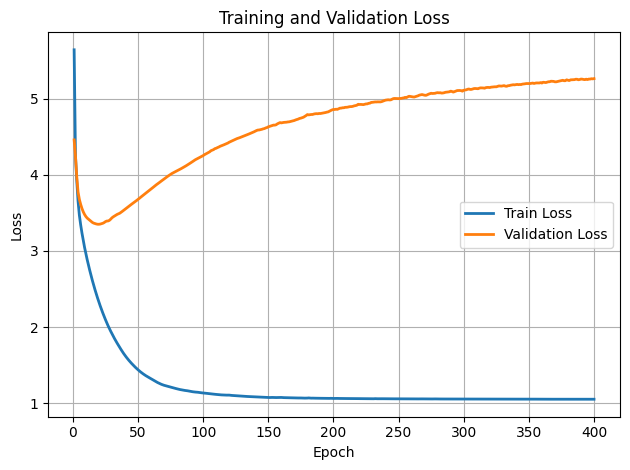

In [27]:
import matplotlib.pyplot as plt

plt.plot(df['Epoch'], df['Train_Loss'], label='Train Loss', linewidth=2)
plt.plot(df['Epoch'], df['Val_Loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [28]:
torch.save(model.state_dict(), 'nextword-model-lightning_part_b.pth')